This notebook was made to generate human sounds used for the pobax_playground experiment.

The objective is to define target words used by the caregiver (one of them will be the toy name, 
others will be distractors.

Upon full execution of PART 1 of this notebook, a json file will be dumped into the config directory.
It will contain the set of generated words and their corresponding diva trajectories and formant trajectories.

PART 2 allows you to load and test the generated sounds

---- PART 1 ----

In [21]:
import os
import numpy as np
from explauto.environment.diva import DivaEnvironment
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
import itertools
import random
import pickle

diva_cfg = dict(diva_path=os.path.join(os.getenv("HOME"), 'software/DIVAsimulink/'),
                synth="octave",
                m_mins = np.array([-1]*7), # motor bounds
                m_maxs = np.array([1]*7),
                s_mins = np.array([ 7.5,  9.25]), # sensory bounds
                s_maxs = np.array([ 9.5 ,  11.25]),
                m_used = range(7), # articulatory parameters used from 0 to 9
                s_used = range(1, 3), # formants output from F0 to F3
                audio = True) # if sound is played

environment = DivaEnvironment(**diva_cfg)

[[ 148.201379  ]
 [ 518.67282314]
 [ 817.28217616]
 [2770.24560365]]
[[ 148.201379  ]
 [ 248.38715584]
 [1991.89098469]
 [3233.90324673]]
[[ 148.201379  ]
 [ 543.53964479]
 [1286.46056973]
 [3310.14896919]]
[[ 148.201379  ]
 [ 524.89937888]
 [1264.93605876]
 [3118.9391129 ]]
[[ 148.201379  ]
 [ 208.18267487]
 [2057.32749916]
 [3707.3008439 ]]
[[ 148.201379  ]
 [ 142.90477606]
 [1743.4776228 ]
 [2945.10075741]]
[[ 148.201379  ]
 [ 521.10119021]
 [1507.82836062]
 [3392.53377   ]]
[[ 148.201379  ]
 [ 628.63854708]
 [1335.69937336]
 [3113.60952489]]
[[ 148.201379  ]
 [ 176.45994219]
 [2206.86922564]
 [3308.05176362]]
[[ 148.201379  ]
 [ 224.54042411]
 [1791.77073111]
 [2891.93964481]]
[[ 148.201379  ]
 [ 357.51241306]
 [1145.85782662]
 [3060.55261555]]
[[ 148.201379  ]
 [ 247.76082869]
 [ 916.73188806]
 [3126.55315735]]
[[ 148.201379  ]
 [ 165.14712349]
 [1445.53129113]
 [2575.42135263]]
[[ 148.201379  ]
 [ -81.49830287]
 [1010.28892077]
 [2523.24871054]]
[[ 148.201379  ]
 [ 544.24546475]


[[ 148.201379  ]
 [ 124.31797344]
 [ 836.19830751]
 [2250.82684388]]
[[ 148.201379  ]
 [ 367.23801194]
 [1168.01563113]
 [3100.80578956]]
[[ 148.201379  ]
 [ 253.91349839]
 [1236.14214355]
 [2614.61378549]]
[[ 148.201379  ]
 [ 194.67416576]
 [2006.42947401]
 [3156.24958331]]
[[ 148.201379  ]
 [ 553.1958527 ]
 [1569.69585152]
 [2902.94005214]]
[[ 148.201379  ]
 [ 289.88320133]
 [1870.53528515]
 [2957.17934073]]
[[ 148.201379  ]
 [ 124.26590509]
 [ 933.79754198]
 [2472.82966979]]
[[ 148.201379  ]
 [ 213.64504522]
 [2072.61962496]
 [2980.60173514]]
[[ 148.201379  ]
 [ 312.71374783]
 [1824.05076147]
 [2962.87104426]]
[[ 148.201379  ]
 [ 302.42969385]
 [1424.69292429]
 [2400.70210207]]
[[ 148.201379  ]
 [ 515.25360276]
 [1730.44591977]
 [2985.34413832]]
[[ 148.201379  ]
 [ 338.17916479]
 [1190.28790683]
 [3061.85686303]]
[[ 148.201379  ]
 [ 265.87921721]
 [1924.42004952]
 [3624.88233704]]
[[ 148.201379  ]
 [ 143.69206326]
 [1683.42553853]
 [2456.81160131]]
[[ 148.201379  ]
 [ 334.86093109]


[[ 148.201379  ]
 [ 435.08700069]
 [1018.90753738]
 [2697.92068191]]
[[ 148.201379  ]
 [ 135.15305712]
 [1865.97127072]
 [3581.86008329]]
[[ 148.201379  ]
 [ 598.47925305]
 [1479.72637499]
 [3259.29928816]]
[[ 148.201379  ]
 [ 276.08639285]
 [2052.34925435]
 [3869.43123783]]
[[ 148.201379  ]
 [ 700.5131528 ]
 [ 969.49576341]
 [3412.86123954]]
[[ 148.201379  ]
 [ 475.85298843]
 [1116.03500172]
 [3125.03861602]]
[[ 148.201379  ]
 [ 292.81531166]
 [1298.96225666]
 [2829.7564497 ]]
[[ 148.201379  ]
 [ 383.97702708]
 [2117.14829312]
 [3430.99566334]]
[[ 148.201379  ]
 [ 391.2295351 ]
 [1702.13213172]
 [2975.72871661]]
[[ 148.201379  ]
 [ 347.16195254]
 [1042.27086012]
 [2346.58968018]]
[[ 148.201379  ]
 [ 138.4334182 ]
 [ 771.99024387]
 [2206.86147873]]
[[ 148.201379  ]
 [ 357.14238378]
 [1434.4317582 ]
 [2819.54494323]]
[[ 148.201379  ]
 [ 113.77808699]
 [1614.95426796]
 [2314.65934528]]
[[ 148.201379  ]
 [ 359.12946251]
 [1835.61338696]
 [2850.16523873]]
[[ 148.201379  ]
 [ 383.15241261]


[[ 148.201379  ]
 [ 445.83054976]
 [1487.9105314 ]
 [3170.80679021]]
[[ 148.201379  ]
 [ 407.70006887]
 [1561.83037104]
 [3111.85906111]]
[[ 148.201379  ]
 [ 197.2224111 ]
 [1714.6424045 ]
 [2912.70343857]]
[[ 148.201379  ]
 [ 178.59058681]
 [1909.49816133]
 [2820.89365635]]
[[ 148.201379  ]
 [ 513.12751549]
 [1205.48641926]
 [2887.37386037]]
[[ 148.201379  ]
 [ 130.23355756]
 [ 765.02396182]
 [3288.49758042]]
[[ 148.201379  ]
 [ 225.13039709]
 [1708.83147753]
 [2218.07573492]]
[[ 148.201379  ]
 [ 191.31131055]
 [1396.91281426]
 [2724.16160923]]
[[ 148.201379  ]
 [ 478.65678104]
 [1739.63552423]
 [2993.05788773]]
[[ 148.201379  ]
 [ 402.50563152]
 [1130.46135431]
 [2848.62848983]]
[[ 148.201379  ]
 [ 103.25928831]
 [1714.75750075]
 [2745.41246983]]
[[ 148.201379  ]
 [ 529.56483462]
 [1782.8948072 ]
 [3236.29627325]]
[[ 148.201379  ]
 [ 336.46738749]
 [1177.209313  ]
 [2906.15715403]]
[[ 148.201379  ]
 [ 325.42337436]
 [1717.95951665]
 [2638.56522154]]
[[ 148.201379  ]
 [ 153.83545212]


[[ 148.201379  ]
 [  66.21888578]
 [1053.15283537]
 [2021.1398948 ]]
[[ 148.201379  ]
 [ 217.89179066]
 [1691.87386692]
 [2621.0374357 ]]
[[ 148.201379  ]
 [ 558.76433899]
 [1383.80394529]
 [3203.50452386]]
[[ 148.201379  ]
 [ 225.04605061]
 [2278.45227492]
 [3692.42626192]]
[[ 148.201379  ]
 [ 400.06750356]
 [1891.50551628]
 [2962.23786056]]
[[ 148.201379  ]
 [ 233.16309282]
 [1493.15165055]
 [2581.73807441]]
[[ 148.201379  ]
 [ 189.0815936 ]
 [2266.44679288]
 [2885.4905218 ]]
[[ 148.201379  ]
 [ 264.67862389]
 [1793.58260683]
 [3165.76721704]]
[[ 148.201379  ]
 [  90.55659015]
 [1785.47910189]
 [3220.51665579]]
[[ 148.201379  ]
 [ 319.63216632]
 [ 867.99684939]
 [2192.87982035]]
[[ 148.201379  ]
 [ 474.53828379]
 [1509.41689458]
 [3226.85514957]]
[[ 148.201379  ]
 [ 267.80566819]
 [2371.27707949]
 [3554.54801817]]
[[ 148.201379  ]
 [ 544.27132311]
 [1223.93207795]
 [3085.61988757]]
[[ 148.201379  ]
 [ 113.12254574]
 [1777.30202629]
 [3643.43425865]]
[[ 148.201379  ]
 [ 353.85794569]


[[ 148.201379  ]
 [ 519.18390154]
 [1684.80257578]
 [2960.46113923]]
[[ 148.201379  ]
 [ 507.89042995]
 [1751.01272681]
 [3127.0294477 ]]
[[ 148.201379  ]
 [ 149.6115777 ]
 [1883.91810054]
 [2471.94608158]]
[[ 148.201379  ]
 [ 235.98106316]
 [1954.58398378]
 [3350.29971779]]
[[ 148.201379  ]
 [ 402.33823023]
 [1485.26352638]
 [2859.87536262]]
[[ 148.201379  ]
 [ 286.46628652]
 [ 735.19073108]
 [3089.94060102]]
[[ 148.201379  ]
 [ 342.15949811]
 [1737.72389977]
 [3924.56796008]]
[[ 148.201379  ]
 [ 336.35491445]
 [1009.0306792 ]
 [2994.64762456]]
[[ 148.201379  ]
 [ 239.33027957]
 [ 978.5863404 ]
 [3120.50104513]]
[[ 148.201379  ]
 [ 289.87238617]
 [1890.9101889 ]
 [3156.80041908]]
[[ 148.201379  ]
 [ 518.54032406]
 [1838.55630861]
 [2906.57509459]]
[[ 148.201379  ]
 [ 694.5746408 ]
 [1182.93678411]
 [3937.56093139]]
[[ 148.201379  ]
 [ 290.18874023]
 [2316.01820209]
 [3641.73576885]]
[[ 148.201379  ]
 [ 572.66961559]
 [1214.38975745]
 [2573.89202327]]
[[ 148.201379  ]
 [ 274.81889538]


[[ 148.201379  ]
 [ 386.97114896]
 [1959.96799832]
 [3054.6696431 ]]
[[ 148.201379  ]
 [ 325.91053245]
 [2008.6302994 ]
 [3126.78793987]]
[[ 148.201379  ]
 [ 439.06168147]
 [1236.47253126]
 [2597.55874691]]
[[ 148.201379  ]
 [ 589.22063141]
 [1203.16249055]
 [3014.7382686 ]]
[[ 148.201379  ]
 [ 418.94786326]
 [1418.51285475]
 [3259.93072943]]
[[ 148.201379  ]
 [ 164.37980514]
 [1682.98601594]
 [2817.76766433]]
[[ 148.201379  ]
 [ 265.70419567]
 [2013.64896716]
 [2920.55026233]]
[[ 148.201379  ]
 [ 320.70777269]
 [1803.13521282]
 [2786.56299208]]
[[ 148.201379  ]
 [ 550.46274398]
 [1538.27445997]
 [3191.1700982 ]]
[[ 148.201379  ]
 [ 171.44358912]
 [ 913.89415125]
 [2958.68370741]]
[[ 148.201379  ]
 [ 175.91719008]
 [2199.03129278]
 [3208.28364912]]
[[ 148.201379  ]
 [ 465.8836926 ]
 [1795.35307858]
 [2959.39606355]]
[[ 148.201379  ]
 [ 169.4766437 ]
 [1336.01634299]
 [2730.91389328]]
[[ 148.201379  ]
 [ 242.8752595 ]
 [2137.75649727]
 [3835.00643363]]
[[ 148.201379  ]
 [ 422.2462742 ]


[[ 148.201379  ]
 [ 190.7528167 ]
 [1876.55445099]
 [3242.65775672]]
[[ 148.201379  ]
 [ 414.83952583]
 [2028.44003194]
 [2951.29498641]]
[[ 148.201379  ]
 [ 152.14464202]
 [1406.56863795]
 [2242.47133858]]
[[ 148.201379  ]
 [ 452.80496753]
 [1308.10517259]
 [2741.80523961]]
[[ 148.201379  ]
 [ 495.99963994]
 [1759.86662466]
 [2987.05305689]]
[[ 148.201379  ]
 [ 336.91701321]
 [1225.90178486]
 [3049.4021255 ]]
[[ 148.201379  ]
 [ 416.5951684 ]
 [2085.45322653]
 [3166.06814211]]
[[ 148.201379  ]
 [ 396.75038677]
 [1634.93696419]
 [2818.06504195]]
[[ 148.201379  ]
 [ 186.8681046 ]
 [1755.95756317]
 [2777.92590668]]
[[ 148.201379  ]
 [ 629.13192243]
 [1422.3877748 ]
 [3172.76312629]]
[[ 148.201379  ]
 [ 187.87876803]
 [1651.47403735]
 [2754.56972984]]
[[ 148.201379  ]
 [ 415.27226242]
 [1706.80831576]
 [3669.47086567]]
[[ 148.201379  ]
 [ 436.31955769]
 [1756.24741213]
 [2892.49115291]]
[[ 148.201379  ]
 [ 205.62322593]
 [1303.25248979]
 [2342.89411835]]
[[ 148.201379  ]
 [ 149.78379879]


[[ 148.201379  ]
 [ 476.98779892]
 [1429.66705845]
 [3517.96790765]]
[[ 148.201379  ]
 [ 412.77659692]
 [1523.31715454]
 [3072.68665902]]
[[ 148.201379  ]
 [ 263.82917891]
 [2198.99570058]
 [3363.95162542]]
[[ 148.201379  ]
 [ 471.81184107]
 [1090.1281086 ]
 [3276.6476779 ]]
[[ 148.201379  ]
 [ -12.85182872]
 [ 746.9888086 ]
 [2053.26441237]]
[[ 148.201379  ]
 [  77.28771357]
 [1792.99332553]
 [3300.53739987]]
[[ 148.201379  ]
 [ 388.36430806]
 [1426.0340726 ]
 [3027.59425953]]
[[ 148.201379  ]
 [ 200.61619778]
 [1738.07375381]
 [2758.35078804]]
[[ 148.201379  ]
 [ 206.06478122]
 [2003.8810431 ]
 [3810.58712288]]
[[ 148.201379  ]
 [ 437.3947434 ]
 [1566.89264333]
 [2822.0078248 ]]
[[ 148.201379  ]
 [ 177.41145523]
 [2026.57833122]
 [3724.45172888]]
[[ 148.201379  ]
 [ 439.47874973]
 [1917.58833774]
 [3073.35996404]]
[[ 148.201379  ]
 [ 464.30887364]
 [1538.85018705]
 [3018.01309434]]
[[ 148.201379  ]
 [ 492.86080155]
 [1415.35387169]
 [3661.39049629]]
[[ 148.201379  ]
 [ 437.03477226]


(1200.0, 200.0)

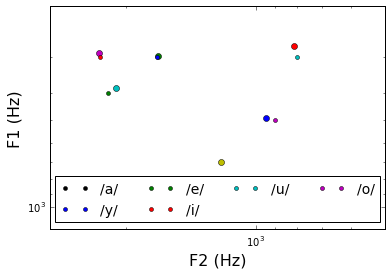

In [22]:
# Step 1 - Using random sound trajectories production to generate data,
# with some close to our target vowels, hopefully

%matplotlib inline
nb_iter = 1000
data = np.zeros((nb_iter,2))
ms = np.zeros((nb_iter,7))
for i,m in enumerate(environment.random_motors(nb_iter)):
    formants = environment.update(m)
    data[i][:] = np.array([formants[0],formants[1]])
    ms[i] = m

# Plot some vowels
v_o = list(np.log2([500, 900]))
v_y = list(np.log2([300, 1700]))
v_u = list(np.log2([300, 800]))
v_e = list(np.log2([400, 2200]))
v_i = list(np.log2([300, 2300]))
v_a = list(np.log2([800, 1300]))
vowels_array = np.array([v_o, v_y, v_u, v_e, v_i, v_a])
vowels_idx = dict(o=0, y=1, u=2, e=3, i=4, a=5)
print vowels_array.shape
vowels = dict(o=v_o, y=v_y, u=v_u, e=v_e, i=v_i, a=v_a)

#now find sounds closest to vowels using nearest neighbors
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(data)
distances, indices = nbrs.kneighbors(vowels_array)
for point_idx in indices:
    plt.loglog(2.**data[point_idx[0]][1], 2.**data[point_idx[0]][0], 'o')

for v in vowels.keys():
    p = plt.plot(2.**vowels[v][1], 2.**vowels[v][0], "o", label="/" + v + "/", markersize=4)

legend = plt.legend(frameon=True, fontsize=14, ncol=4, loc="lower center")

plt.xlabel("F2 (Hz)", fontsize=16)
plt.ylabel("F1 (Hz)", fontsize=16)
plt.xlim([3000., 500])
plt.ylim([1200., 200.])

In [23]:
# Step 2 - Create human sounds as all possible sequences of 3 vowels
human_sounds = []
it = itertools.permutations(["o", "e", "y", "u", "i"], 3)
for _ in range(60): human_sounds.append("".join(list(it.next())))        
random.shuffle(human_sounds)
print "human sounds", human_sounds

# Step 3 - Create 50-step trajectories of these human words
full_human_sound_traj = dict()
human_sound_traj = dict()

full_human_motor_traj = dict()
for k,word in enumerate(human_sounds):
    # 1 - Get nearest neighbors of word's vowels
    closest_sounds = [data[indices[vowels_idx[v]]] for v in word]
    closest_motors = [ms[indices[vowels_idx[v]]] for v in word]
    f1s = []
    f3s = []
    motor_traj = []
    length = [16,16,18]
    for l,sound in enumerate(closest_sounds):
        #print sound
        #print length[l]
        f1s = np.append(f1s,np.full(length[l],sound[0][0]))
        f3s = np.append(f3s,np.full(length[l],sound[0][1]))
        motor_traj = np.append(motor_traj,np.tile(closest_motors[l],length[l]))
    full_human_sound_traj[word] = np.append(f1s,f3s)
    full_human_motor_traj[word] = np.reshape(motor_traj,(50,7))
    #print full_human_sound_traj[word]
    #human_sound_traj[word] = np.append(f1s[np.array([0, 12, 24, 37, 49])],f3s[np.array([0, 12, 24, 37, 49])])
    #print human_sound_traj[word]
    #print full_human_motor_traj[word]




human sounds ['iyu', 'ieu', 'uie', 'ieo', 'eoy', 'oiu', 'eou', 'iey', 'eui', 'ioe', 'eyu', 'yoe', 'eyo', 'iue', 'iuy', 'yei', 'you', 'yie', 'yeu', 'oiy', 'yiu', 'yuo', 'oui', 'ouy', 'yue', 'euo', 'oey', 'eiu', 'yui', 'eiy', 'uey', 'iou', 'euy', 'ueo', 'uye', 'yoi', 'uoe', 'uyo', 'oei', 'oie', 'uei', 'iye', 'oye', 'yeo', 'oyu', 'yio', 'uiy', 'uoy', 'uyi', 'uio', 'eoi', 'iuo', 'uoi', 'eio', 'oyi', 'oue', 'iyo', 'eyi', 'oeu', 'ioy']
iyu
ieu
uie
ieo
eoy
oiu
eou
iey
eui
ioe
eyu
yoe
eyo
iue
iuy
yei
you
yie
yeu
oiy
yiu
yuo
oui
ouy
yue
euo
oey
eiu
yui
eiy
uey
iou
euy
ueo
uye
yoi
uoe
uyo
oei
oie
uei
iye
oye
yeo
oyu
yio
uiy
uoy
uyi
uio
eoi
iuo
uoi
eio
oyi
oue
iyo
eyi
oeu
ioy


In [20]:
print data.shape


AttributeError: 'dict' object has no attribute 'shape'

In [32]:
# Step 4 - Dump data into pickle file
import pickle
from rospkg.rospack import RosPack
import rospy
from os.path import join
rospack = RosPack()
filepath = join(rospack.get_path('pobax_playground'), 'config', 'human_sounds.pickle')
with open(filepath,'w') as outfile:
    pickle.dump([full_human_motor_traj,full_human_sound_traj], outfile)




--- PART 2 ---




In [6]:
# Load data
import pickle
from rospkg.rospack import RosPack
import rospy
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
rospack = RosPack()
filepath = join(rospack.get_path('pobax_playground'), 'config', 'human_sounds.pickle')
with open(filepath,'r') as outfile:
    full_human_motor_traj, full_human_sound_traj = pickle.load(outfile)

[ 8.22231908  8.22231908  8.58487619  8.18084773  8.18084773 10.71975086
 10.71975086 11.04790661 11.17743088 11.17743088]


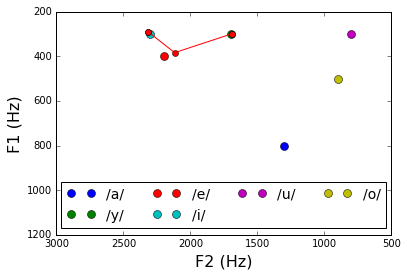

In [18]:
def compress_sound_traj(sound):
    assert(len(sound) == 100)
    f1s = sound[:50]
    f3s = sound[50:]
    return np.append(f1s[np.array([0, 12, 24, 37, 49])],f3s[np.array([0, 12, 24, 37, 49])])

# Visualize sound trajectories
nb_visualize = 6
compact_trajs = {}
for i,(sound_id,traj) in enumerate(full_human_sound_traj.iteritems()):
    compact_trajs[sound_id] = compress_sound_traj(traj)
    if i == nb_visualize:
        break

# Plot some vowels
v_o = list(np.log2([500, 900]))
v_y = list(np.log2([300, 1700]))
v_u = list(np.log2([300, 800]))
v_e = list(np.log2([400, 2200]))
v_i = list(np.log2([300, 2300]))
v_a = list(np.log2([800, 1300]))
vowels = dict(o=v_o, y=v_y, u=v_u, e=v_e, i=v_i, a=v_a)
for v in vowels.keys():
    p = plt.plot(2.**vowels[v][1], 2.**vowels[v][0], "o", label="/" + v + "/", markersize=8)
legend = plt.legend(frameon=True, fontsize=14, ncol=4, loc="lower center")
plt.xlabel("F2 (Hz)", fontsize=16)
plt.ylabel("F1 (Hz)", fontsize=16)
plt.xlim([3000., 500])
plt.ylim([1200., 200.])


print compact_trajs['yei']
plt.plot(2.**compact_trajs['yei'][5:],2.**compact_trajs['yei'][:5],'ro-')

plt.show()

You can use the next cell to hear the target words you produced

In [29]:
from pobax_playground.voice.diva import Diva
from time import sleep
# DIVA CONFIG
diva_cfg = dict(
                m_mins = np.array([-1, -1, -1, -1, -1, -1, -1]),
                m_maxs = np.array([1, 1, 1, 1, 1, 1, 1]),
                s_mins = np.array([ 7.5,  9.25]),
                s_maxs = np.array([ 9.5 ,  11.25]),
                m_used = range(7),
                s_used = range(1, 3),
                rest_position_diva = list([0]*7),
                audio = True,
                diva_use_initial = True,
                diva_use_goal = True,
                used_diva = list([True]*7),
                n_dmps_diva = 7,
                n_bfs_diva = 2,
                move_steps = 50,
                )
# Init Diva
diva = Diva(**diva_cfg)



environment = Diva(**diva_cfg)
#Play human words
for i in range(5): 
    s = diva.compute_sensory_effect(full_human_motor_traj['oui'])
for i in range(5): 
    s = diva.compute_sensory_effect(full_human_motor_traj['you'])

for word,diva_traj in full_human_motor_traj.iteritems():
        print word
        s = diva.compute_sensory_effect(diva_traj)
        #environment.play_sound(environment.art_traj)
        #sleep(5)


compute_sensory_effect
(50, 7)
compute_sensory_effect
(50, 7)
compute_sensory_effect
(50, 7)
compute_sensory_effect
(50, 7)
compute_sensory_effect
(50, 7)
compute_sensory_effect
(50, 7)
compute_sensory_effect
(50, 7)
compute_sensory_effect
(50, 7)
compute_sensory_effect
(50, 7)
compute_sensory_effect
(50, 7)
yei
compute_sensory_effect
(50, 7)
oui
compute_sensory_effect
(50, 7)
uoy
compute_sensory_effect
(50, 7)
uie
compute_sensory_effect
(50, 7)
yeo
compute_sensory_effect
(50, 7)
ueo
compute_sensory_effect
(50, 7)
uio
compute_sensory_effect
(50, 7)
ouy
compute_sensory_effect
(50, 7)
uey
compute_sensory_effect
(50, 7)
uiy
compute_sensory_effect
(50, 7)
uei
compute_sensory_effect
(50, 7)
yeu
compute_sensory_effect
(50, 7)
oiu
compute_sensory_effect
(50, 7)
iey
compute_sensory_effect
(50, 7)
yui
compute_sensory_effect
(50, 7)
euo
compute_sensory_effect
(50, 7)
eui
compute_sensory_effect
(50, 7)
ioy
compute_sensory_effect
(50, 7)
yoi
compute_sensory_effect
(50, 7)
eyi
compute_sensory_effec